In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

root_dir = './archive'

train_dir = root_dir + '/train'
test_dir = root_dir + '/test'

ModuleNotFoundError: No module named 'matplotlib'

In [15]:
labels = os.listdir(train_dir)
labels

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

In [18]:
target_var = labels


In [19]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 35887
Total training images: 28709
Total testing images: 7178


In [21]:
for i in range(len(target_var)):
    d = os.path.join(train_dir, target_var[i], os.listdir(os.path.join(train_dir, target_var[i]))[0])
    axes[i].imshow(plt.imread(d))
    axes[i].set_title(target_var[i])
    axes[i].axis('off')  # Hides the axes for a cleaner look
    print(f"Completed: {target_var[i]}")  # Print the label

plt.show()

Completed: happy
Completed: sad
Completed: fearful
Completed: neutral
Completed: angry
Completed: disgusted
Completed: surprised


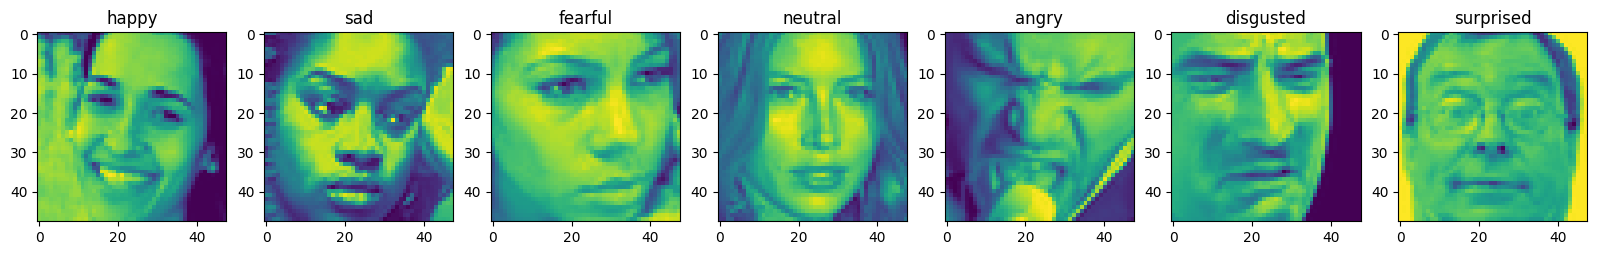

In [23]:
fig, axes = plt.subplots(1, 7, figsize=(20, 8))

for i in range(len(target_var)):
    # Form the directory path
    directory = './archive/train/' + target_var[i] + '/'
    
    # Check if the directory exists
    if os.path.exists(directory):
        # Get the first image file in the directory
        files = os.listdir(directory)
        if files:
            image_path = os.path.join(directory, files[0])
            
            # Display the image
            axes[i].imshow(plt.imread(image_path))
            axes[i].set_title(target_var[i])
        else:
            print(f"No images found in {directory}")
    else:
        print(f"Directory {directory} does not exist.")


/var/folders/1b/mjc8112x4452qqpf1zwfffkh0000gn/T/ipykernel_19745/3457566961.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout() #format images


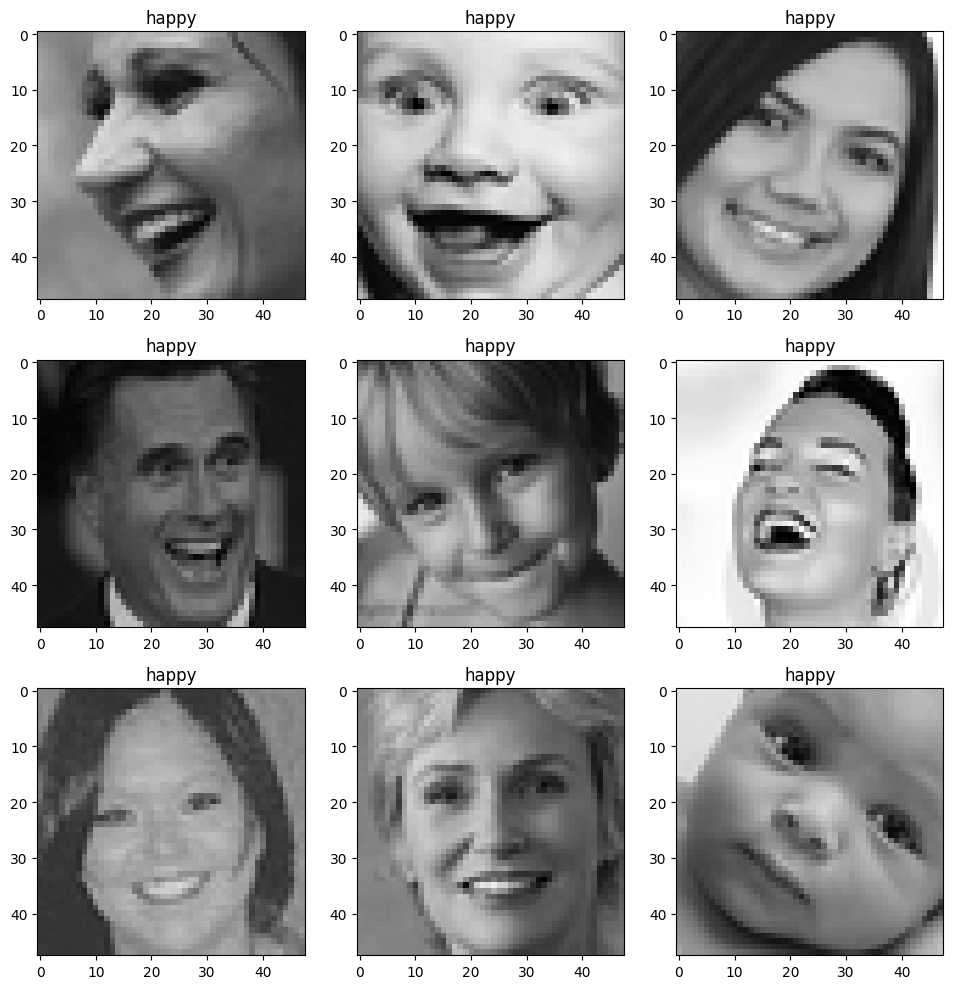

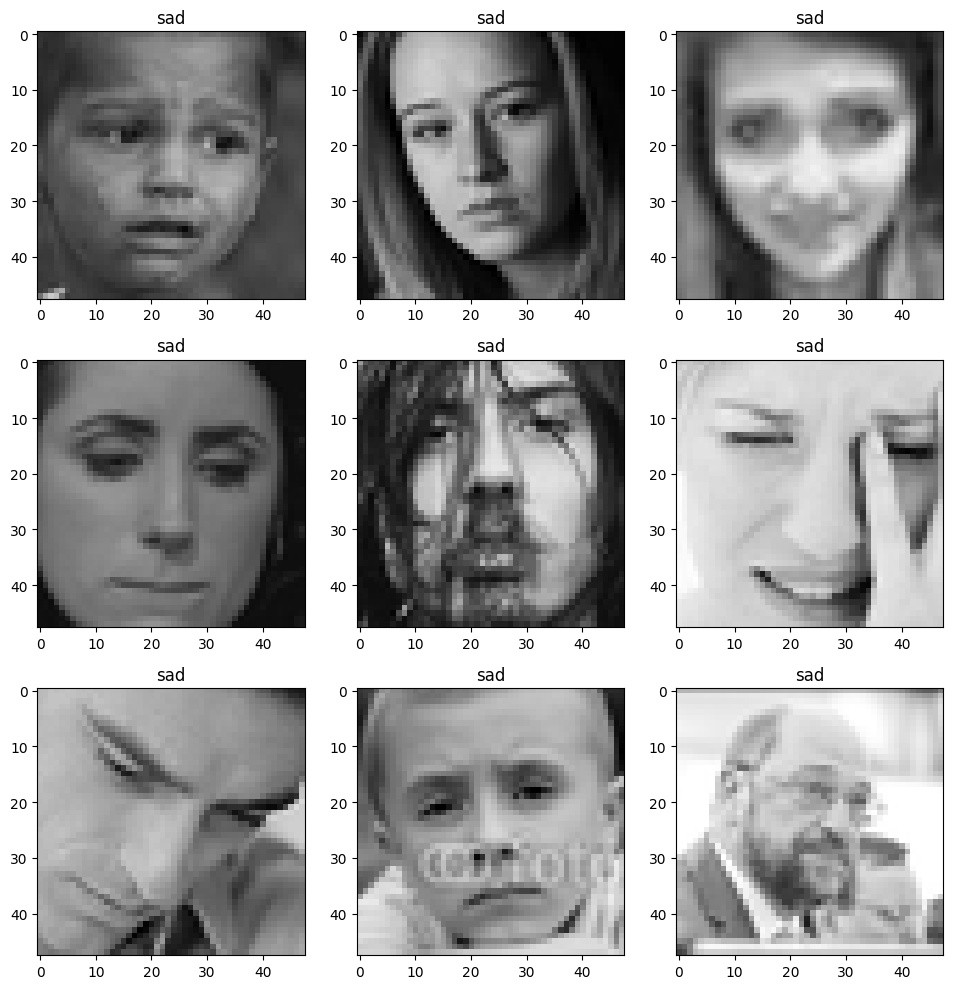

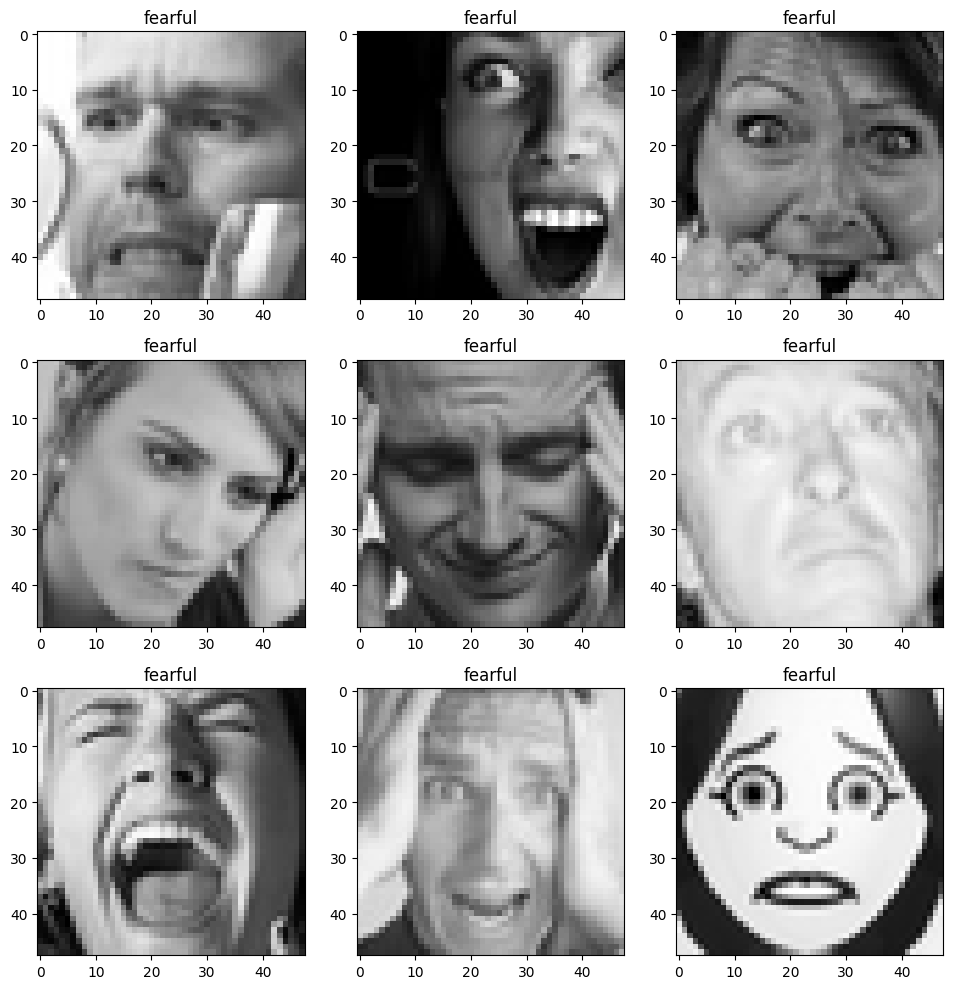

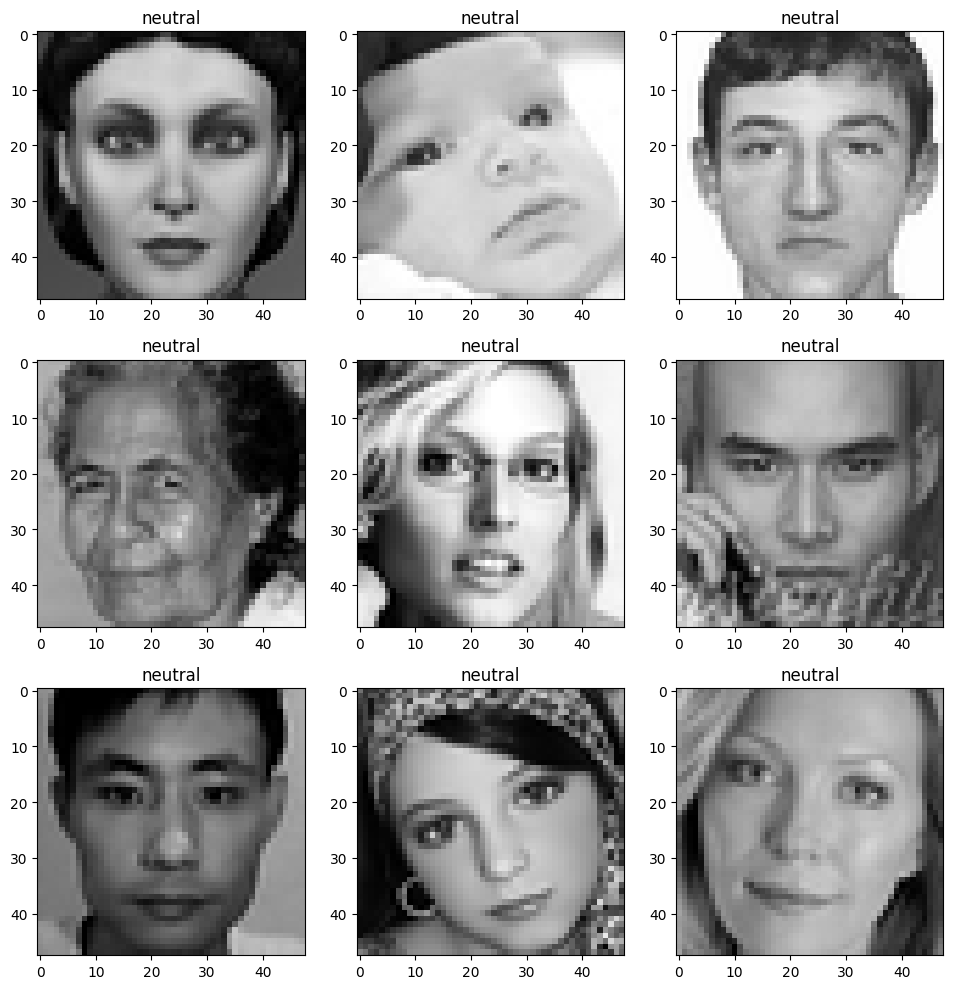

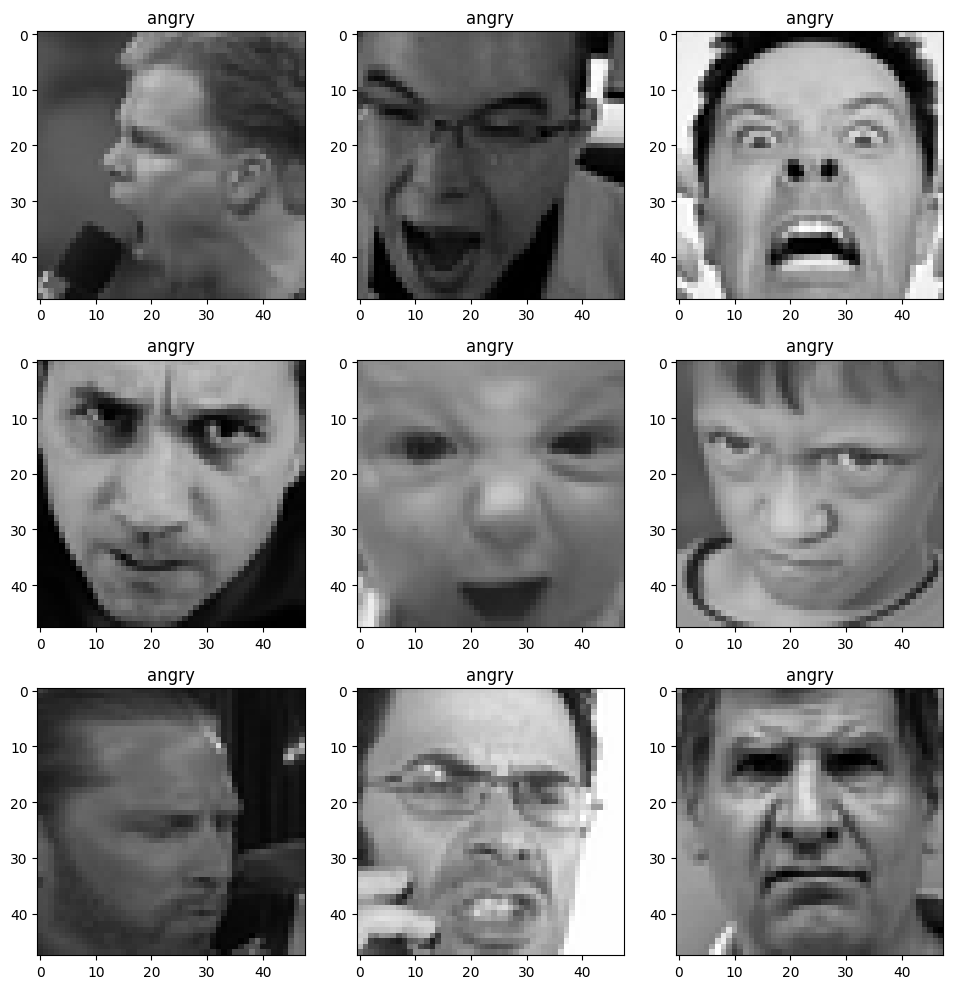

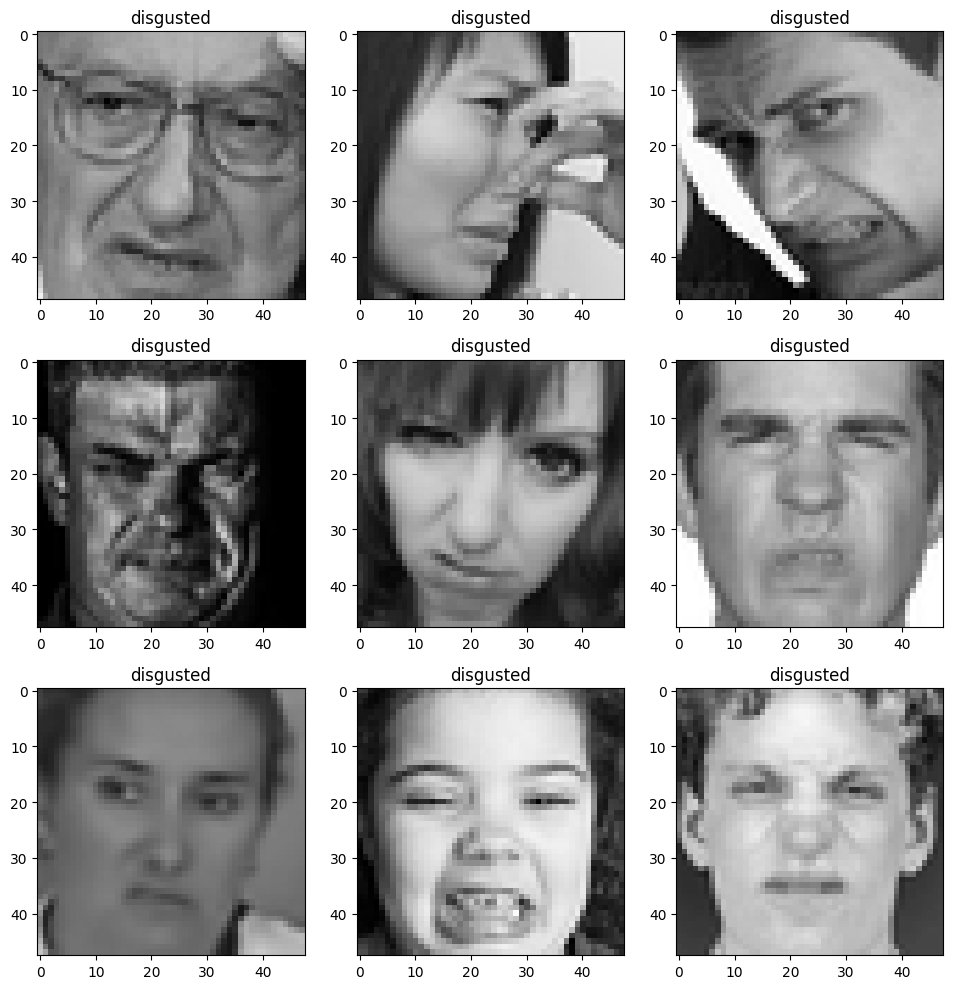

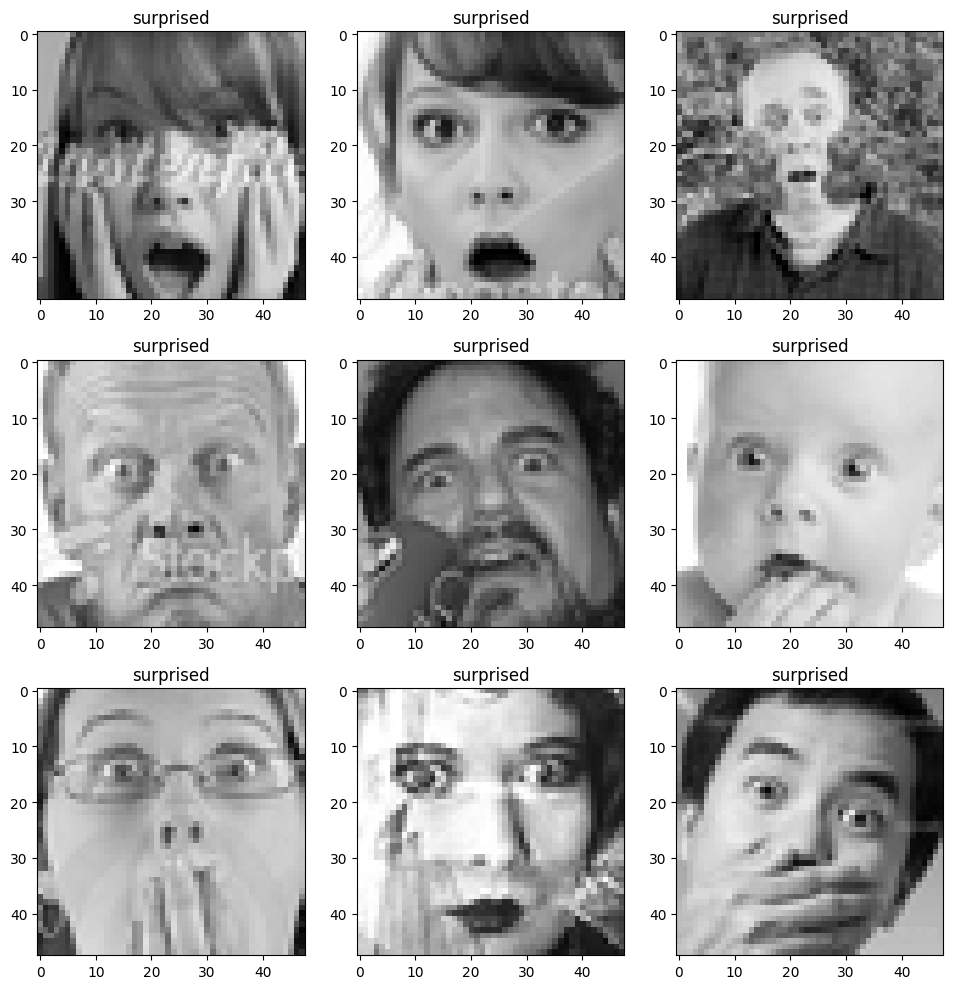

In [25]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

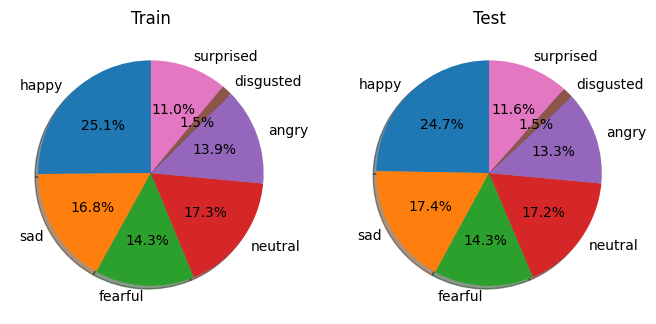

Emotion : happy
	Training : 7215
	Testing : 1774
Emotion : sad
	Training : 4830
	Testing : 1247
Emotion : fearful
	Training : 4097
	Testing : 1024
Emotion : neutral
	Training : 4965
	Testing : 1233
Emotion : angry
	Training : 3995
	Testing : 958
Emotion : disgusted
	Training : 436
	Testing : 111
Emotion : surprised
	Training : 3171
	Testing : 831


In [33]:
# Calculate number of files in each directory
x_train = np.array([len(os.listdir(os.path.join(train_dir, label))) for label in target_var])
x_test = np.array([len(os.listdir(os.path.join(test_dir, label))) for label in target_var])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=target_var, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(x_test, labels=target_var, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

# Printing file counts
for label in target_var:
    train_path = os.path.join(train_dir, label)
    test_path = os.path.join(test_dir, label)
    
    print('Emotion : ' + label)
    print('\tTraining : ' + str(len(os.listdir(train_path))))
    print('\tTesting : ' + str(len(os.listdir(test_path))))

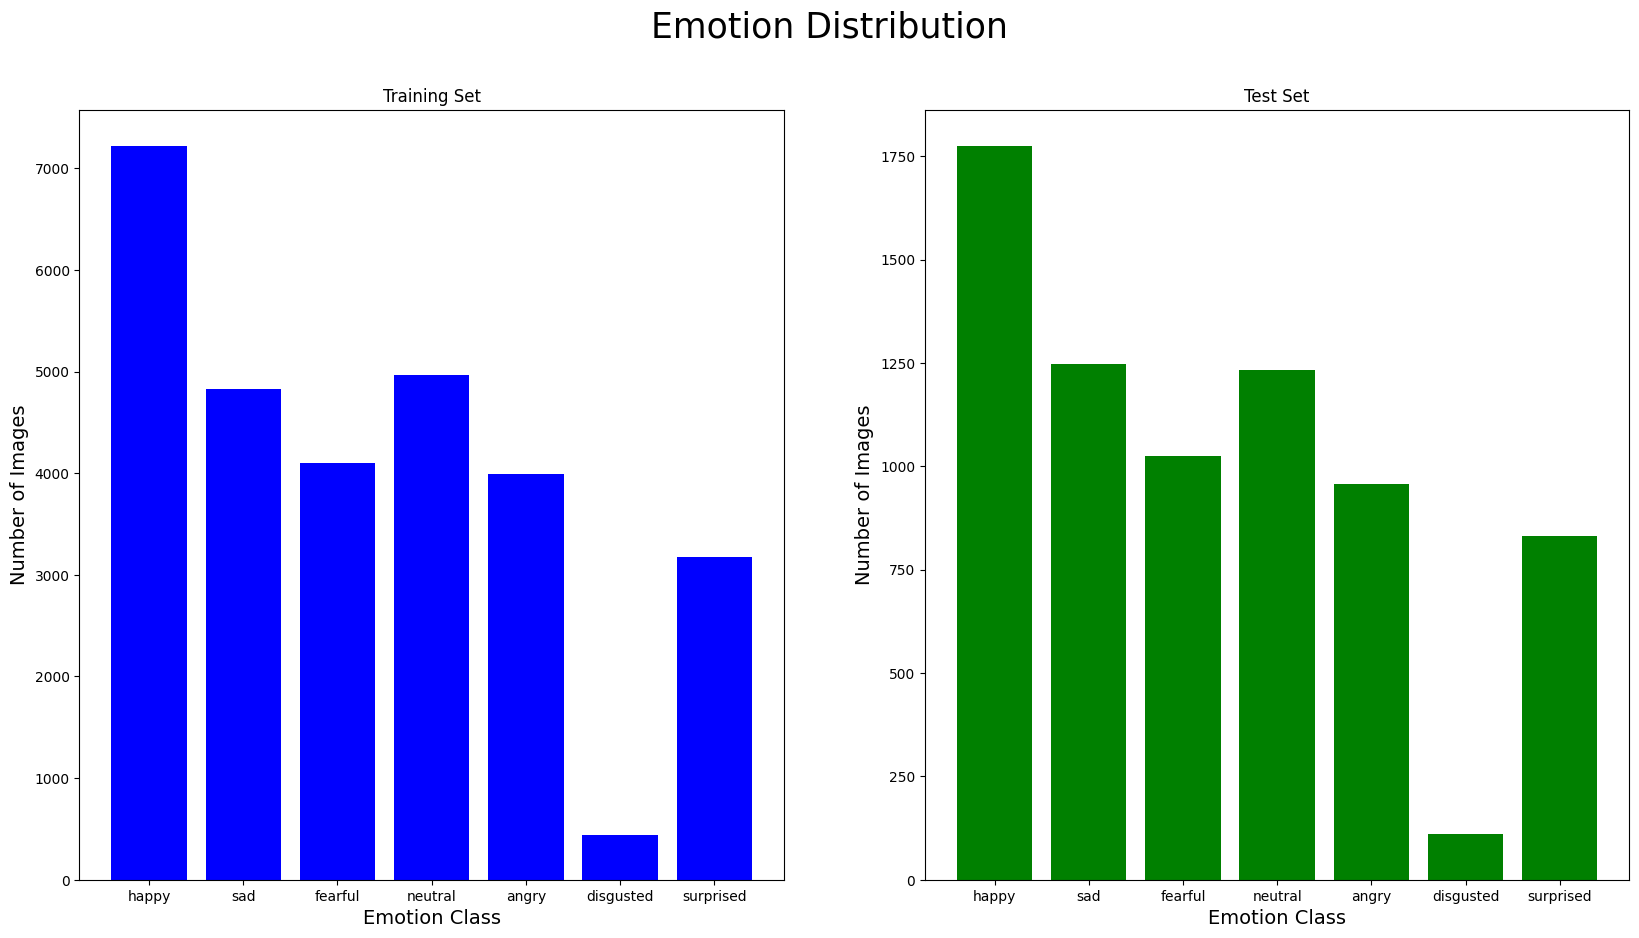

In [34]:

# Calculate number of files in each directory
train_dist= np.array([len(os.listdir(os.path.join(train_dir, label))) for label in target_var])
test_dist = np.array([len(os.listdir(os.path.join(test_dir, label))) for label in target_var])


x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

In [37]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [38]:
train.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [39]:
test.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [40]:
model = tf.keras.Sequential()

In [41]:
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [42]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [43]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [44]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [45]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))